# ResNet50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf

# Define la ruta para guardar los checkpoints
checkpoint_path = "/content/drive/MyDrive/colab_checkpoints/cp.weights.h5"

# Crea un callback para guardar los pesos del modelo
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Al entrenar tu modelo, incluye el callback
#model.fit(train_images,
          #train_labels,
          #epochs=50,
          #validation_data=(test_images, test_labels),
          #callbacks=[cp_callback]) # Pasa el callback al método fit

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar librerías para el modelo
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Modificar esta línea:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc


In [ ]:
# Configurar dispositivo (GPU si está disponible)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Dispositivo disponible: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU disponible: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB')

Dispositivo disponible: cuda
GPU: Tesla T4
Memoria GPU disponible: 14.74 GB


Dispositivo disponible: cuda
GPU: Tesla T4
Memoria GPU disponible: 14.74 GB
Transformaciones optimizadas definidas.
DataLoaders creados: Train (275 batches), Val (43 batches), Test (107 batches)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 188MB/s]


Modelo creado. Parámetros entrenables iniciales (solo cabeza): 1,055,234
Función de pérdida: CrossEntropyLoss con Label Smoothing (0.1) y pesos de clase: tensor([0.8362, 1.2436], device='cuda:0')

--- FASE 1: Entrenando solo el clasificador por 5 épocas ---


Evaluating: 100%|██████████| 43/43 [00:51<00:00,  1.21s/it]


Época [1/5] - Train Loss: 0.6616, Train Acc: 0.6672 | Val Loss: 0.5661, Val Acc: 0.7272, Val F1: 0.7192


Evaluating: 100%|██████████| 43/43 [00:52<00:00,  1.23s/it]


Época [2/5] - Train Loss: 0.5982, Train Acc: 0.7041 | Val Loss: 0.5300, Val Acc: 0.7761, Val F1: 0.7457


Evaluating: 100%|██████████| 43/43 [00:52<00:00,  1.23s/it]


Época [3/5] - Train Loss: 0.5848, Train Acc: 0.7216 | Val Loss: 0.5218, Val Acc: 0.7775, Val F1: 0.7530


Evaluating: 100%|██████████| 43/43 [00:52<00:00,  1.23s/it]


Época [4/5] - Train Loss: 0.5681, Train Acc: 0.7345 | Val Loss: 0.5079, Val Acc: 0.7980, Val F1: 0.7742


Evaluating: 100%|██████████| 43/43 [00:53<00:00,  1.24s/it]


Época [5/5] - Train Loss: 0.5536, Train Acc: 0.7456 | Val Loss: 0.5046, Val Acc: 0.7965, Val F1: 0.7653

--- FASE 2: Descongelando y haciendo fine-tuning de todo el modelo por 15 épocas ---
Modelo descongelado. Parámetros entrenables totales: 24,563,266 (100.00%)


Evaluating: 100%|██████████| 43/43 [00:52<00:00,  1.23s/it]


✓ Nuevo mejor modelo guardado! (Val F1: 0.8169)

Época [1/15] - Tiempo: 489.03s
Train - Loss: 0.5344, Acc: 0.7627
Val   - Loss: 0.4615, Acc: 0.8352, Precision: 0.7500, Recall: 0.8968, F1: 0.8169
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:51<00:00,  1.20s/it]


✓ Nuevo mejor modelo guardado! (Val F1: 0.8440)

Época [2/15] - Tiempo: 490.96s
Train - Loss: 0.4742, Acc: 0.8213
Val   - Loss: 0.4273, Acc: 0.8614, Precision: 0.7835, Recall: 0.9146, F1: 0.8440
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:51<00:00,  1.20s/it]


✓ Nuevo mejor modelo guardado! (Val F1: 0.8472)

Época [3/15] - Tiempo: 491.65s
Train - Loss: 0.4331, Acc: 0.8519
Val   - Loss: 0.4105, Acc: 0.8651, Precision: 0.7904, Recall: 0.9128, F1: 0.8472
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:51<00:00,  1.19s/it]


✓ Nuevo mejor modelo guardado! (Val F1: 0.8622)

Época [4/15] - Tiempo: 489.40s
Train - Loss: 0.3951, Acc: 0.8827
Val   - Loss: 0.3970, Acc: 0.8804, Precision: 0.8169, Recall: 0.9128, F1: 0.8622
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:51<00:00,  1.20s/it]



Época [5/15] - Tiempo: 489.69s
Train - Loss: 0.3837, Acc: 0.8917
Val   - Loss: 0.3970, Acc: 0.8716, Precision: 0.8164, Recall: 0.8861, F1: 0.8498
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:53<00:00,  1.24s/it]


✓ Nuevo mejor modelo guardado! (Val F1: 0.8636)

Época [6/15] - Tiempo: 499.30s
Train - Loss: 0.3484, Acc: 0.9159
Val   - Loss: 0.3942, Acc: 0.8848, Precision: 0.8389, Recall: 0.8897, F1: 0.8636
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:53<00:00,  1.24s/it]


✓ Nuevo mejor modelo guardado! (Val F1: 0.8753)

Época [7/15] - Tiempo: 495.14s
Train - Loss: 0.3310, Acc: 0.9289
Val   - Loss: 0.3987, Acc: 0.8942, Precision: 0.8469, Recall: 0.9057, F1: 0.8753
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:52<00:00,  1.23s/it]



Época [8/15] - Tiempo: 495.82s
Train - Loss: 0.3185, Acc: 0.9372
Val   - Loss: 0.3927, Acc: 0.8855, Precision: 0.8534, Recall: 0.8701, F1: 0.8617
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:53<00:00,  1.25s/it]



Época [9/15] - Tiempo: 493.79s
Train - Loss: 0.3010, Acc: 0.9514
Val   - Loss: 0.3920, Acc: 0.8950, Precision: 0.8579, Recall: 0.8915, F1: 0.8743
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:53<00:00,  1.24s/it]



Época [10/15] - Tiempo: 497.70s
Train - Loss: 0.2922, Acc: 0.9565
Val   - Loss: 0.4008, Acc: 0.8942, Precision: 0.8589, Recall: 0.8879, F1: 0.8731
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:51<00:00,  1.21s/it]



Época [11/15] - Tiempo: 494.91s
Train - Loss: 0.2865, Acc: 0.9609
Val   - Loss: 0.4009, Acc: 0.8920, Precision: 0.8473, Recall: 0.8986, F1: 0.8722
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:53<00:00,  1.24s/it]



Época [12/15] - Tiempo: 496.42s
Train - Loss: 0.2777, Acc: 0.9661
Val   - Loss: 0.3884, Acc: 0.8957, Precision: 0.8656, Recall: 0.8826, F1: 0.8740
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:55<00:00,  1.28s/it]



Época [13/15] - Tiempo: 504.82s
Train - Loss: 0.2759, Acc: 0.9678
Val   - Loss: 0.3913, Acc: 0.8920, Precision: 0.8569, Recall: 0.8843, F1: 0.8704
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:55<00:00,  1.28s/it]



Época [14/15] - Tiempo: 512.96s
Train - Loss: 0.2732, Acc: 0.9671
Val   - Loss: 0.3987, Acc: 0.8899, Precision: 0.8320, Recall: 0.9164, F1: 0.8721
------------------------------------------------------------


Evaluating: 100%|██████████| 43/43 [00:54<00:00,  1.27s/it]



Época [15/15] - Tiempo: 511.60s
Train - Loss: 0.2741, Acc: 0.9686
Val   - Loss: 0.3993, Acc: 0.8920, Precision: 0.8405, Recall: 0.9093, F1: 0.8735
------------------------------------------------------------

Mejor modelo cargado para evaluación final en el conjunto de Test.


Evaluating: 100%|██████████| 107/107 [02:19<00:00,  1.30s/it]



RESULTADOS FINALES OPTIMIZADOS EN CONJUNTO DE TEST:
Accuracy:  0.8095
Precision: 0.7063
Recall:    0.9161
F1-Score:  0.7976
AUC-ROC:   0.9153
Loss:      0.5245


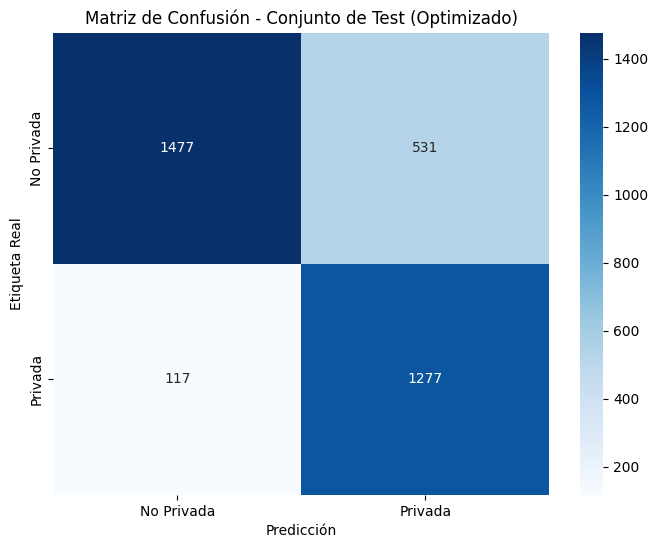

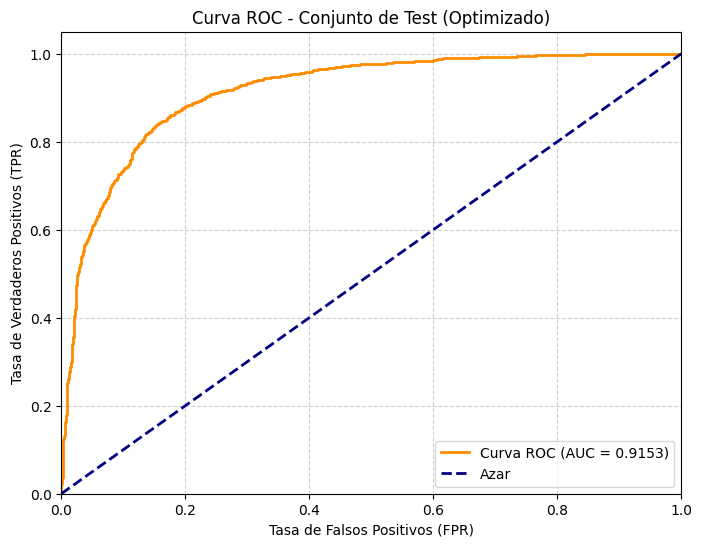

In [ ]:
# -*- coding: utf-8 -*-
"""CNN-TFE-Optimized.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/10Vqpt0LP6ZwMeZBY-ar20javE4rEbETn
"""

# Importar librerías para el modelo
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Configurar dispositivo (GPU si está disponible)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Dispositivo disponible: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU disponible: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB')


class PrivacyDataset(Dataset):
    """Dataset personalizado para clasificación de imágenes privadas/no privadas"""

    def __init__(self, dataframe, image_dir, transform=None):
        """
        Args:
            dataframe: DataFrame con las anotaciones
            image_dir: Directorio donde están las imágenes
            transform: Transformaciones a aplicar
        """
        self.df = dataframe.reset_index(drop=True)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Obtener información de la imagen
        row = self.df.iloc[idx]

        # Construir path de la imagen (cambiar extensión a .png)
        image_filename = row['image']
        base_name = os.path.splitext(image_filename)[0]
        image_path = os.path.join(self.image_dir, base_name + '.png')

        # Cargar imagen
        try:
            image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"Error cargando imagen {image_path}: {e}")
            # Crear imagen placeholder en caso de error
            image = Image.new('RGB', (224, 224), color='black')

        # Aplicar transformaciones
        if self.transform:
            image = self.transform(image)

        # Obtener etiqueta (1 para privada, 0 para no privada)
        label = int(row['private'])

        return image, label

# --- OPTIMIZACIÓN 1: Aumento de Datos (Data Augmentation) más Agresivo ---
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)), # Crop con variación de tamaño
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2), ratio=(0.3, 3.3), value=0) # Borrado aleatorio de regiones
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print("Transformaciones optimizadas definidas.")

# Crear datasets y DataLoaders (sin cambios en esta parte)
train_dataset = PrivacyDataset(dataframe=train_df_cleaned, image_dir=IMAGE_DIR, transform=train_transform)
val_dataset = PrivacyDataset(dataframe=val_df_cleaned, image_dir=IMAGE_DIR, transform=val_transform)
test_dataset = PrivacyDataset(dataframe=test_df_cleaned, image_dir=IMAGE_DIR, transform=val_transform)

BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True if torch.cuda.is_available() else False)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True if torch.cuda.is_available() else False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True if torch.cuda.is_available() else False)

print(f"DataLoaders creados: Train ({len(train_loader)} batches), Val ({len(val_loader)} batches), Test ({len(test_loader)} batches)")


# --- OPTIMIZACIÓN 2: Modelo con Clasificador Mejorado y Fine-Tuning Gradual ---
class ResNet50BinaryOptimized(nn.Module):
    def __init__(self, num_classes=2, pretrained=True):
        super(ResNet50BinaryOptimized, self).__init__()
        # Cargar ResNet50 con los pesos más recientes
        weights = models.ResNet50_Weights.DEFAULT if pretrained else None
        self.resnet = models.resnet50(weights=weights)

        # Congelar todas las capas del backbone inicialmente
        for param in self.resnet.parameters():
            param.requires_grad = False

        # Reemplazar la última capa con un clasificador más robusto
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.BatchNorm1d(num_features), # Normalización del batch antes del clasificador
            nn.Dropout(0.5), # Aumento del dropout
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5), # Otro dropout
            nn.Linear(512, num_classes)
        )

    def unfreeze_backbone(self):
        """Descongela todas las capas para el fine-tuning completo."""
        for param in self.resnet.parameters():
            param.requires_grad = True

    def forward(self, x):
        return self.resnet(x)

# Crear el modelo
model = ResNet50BinaryOptimized(num_classes=2, pretrained=True)
model = model.to(device)

# Contar parámetros entrenables (inicialmente solo el clasificador)
trainable_params_head = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Modelo creado. Parámetros entrenables iniciales (solo cabeza): {trainable_params_head:,}")

# Calcular pesos de clases (sin cambios)
train_labels = train_df_cleaned['private'].values
class_counts = np.bincount(train_labels)
class_weights = torch.FloatTensor(len(train_labels) / (len(class_counts) * class_counts)).to(device)

# --- OPTIMIZACIÓN 3: Función de Pérdida con Label Smoothing ---
criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)
print(f"Función de pérdida: CrossEntropyLoss con Label Smoothing (0.1) y pesos de clase: {class_weights}")


# Funciones de entrenamiento y evaluación (sin cambios estructurales, solo para mostrar métricas)
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    predictions, targets = [], []
    progress_bar = tqdm(dataloader, desc='Training')
    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        predictions.extend(preds.cpu().numpy())
        targets.extend(labels.cpu().numpy())
        progress_bar.set_postfix({'loss': loss.item()})
    return running_loss / len(dataloader), accuracy_score(targets, predictions)

def evaluate(model, dataloader, criterion, device):
    model.eval()
    all_probs = []
    all_preds = []
    all_targets = []
    running_loss = 0.0
    #predictions, targets = [], []
    with torch.no_grad():
        progress_bar = tqdm(dataloader, desc='Evaluating')
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)[:, 1]
            all_probs.extend(probs.cpu().numpy())

            _, preds = torch.max(outputs, 1)
            #predictions.extend(preds.cpu().numpy())
            #targets.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy()) # Cambiar a all_preds
            all_targets.extend(labels.cpu().numpy()) # Cambiar a all_targets




    epoch_loss = running_loss / len(dataloader)
    epoch_acc = accuracy_score(all_targets, all_preds)
    epoch_precision = precision_score(all_targets, all_preds, average='binary', zero_division=0)
    epoch_recall = recall_score(all_targets, all_preds, average='binary', zero_division=0)
    epoch_f1 = f1_score(all_targets, all_preds, average='binary', zero_division=0)
    return epoch_loss, epoch_acc, epoch_precision, epoch_recall, epoch_f1, all_preds, all_targets, all_probs

# --- FASE 1: ENTRENAR SOLO EL CLASIFICADOR ---
NUM_EPOCHS_HEAD = 5
print(f"\n--- FASE 1: Entrenando solo el clasificador por {NUM_EPOCHS_HEAD} épocas ---")

# --- OPTIMIZACIÓN 4: Optimizador AdamW y Scheduler ---
optimizer_head = optim.AdamW(model.resnet.fc.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_head = optim.lr_scheduler.CosineAnnealingLR(optimizer_head, T_max=NUM_EPOCHS_HEAD, eta_min=1e-6)

for epoch in range(NUM_EPOCHS_HEAD):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer_head, device)
    val_loss, val_acc, val_precision, val_recall, val_f1, _, _, _ = evaluate(model, val_loader, criterion, device)
    scheduler_head.step()
    print(f"Época [{epoch+1}/{NUM_EPOCHS_HEAD}] - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

# --- FASE 2: FINE-TUNING DE TODO EL MODELO ---
NUM_EPOCHS_FULL = 15
print(f"\n--- FASE 2: Descongelando y haciendo fine-tuning de todo el modelo por {NUM_EPOCHS_FULL} épocas ---")

model.unfreeze_backbone()
total_params = sum(p.numel() for p in model.parameters())
trainable_params_full = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Modelo descongelado. Parámetros entrenables totales: {trainable_params_full:,} ({100*trainable_params_full/total_params:.2f}%)")


# --- OPTIMIZACIÓN 5: Tasa de Aprendizaje Diferencial ---
optimizer_full = optim.AdamW([
    {'params': model.resnet.conv1.parameters(), 'lr': 1e-5},
    {'params': model.resnet.bn1.parameters(), 'lr': 1e-5},
    {'params': model.resnet.layer1.parameters(), 'lr': 2e-5},
    {'params': model.resnet.layer2.parameters(), 'lr': 4e-5},
    {'params': model.resnet.layer3.parameters(), 'lr': 6e-5},
    {'params': model.resnet.layer4.parameters(), 'lr': 8e-5},
    {'params': model.resnet.fc.parameters(), 'lr': 1e-4} # Tasa mayor para el clasificador
], lr=1e-5, weight_decay=1e-4)

scheduler_full = optim.lr_scheduler.CosineAnnealingLR(optimizer_full, T_max=NUM_EPOCHS_FULL, eta_min=1e-7)

# Entrenamiento completo
best_val_f1 = 0.0
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

for epoch in range(NUM_EPOCHS_FULL):
    start_time = time.time()
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer_full, device)
    val_loss, val_acc, val_precision, val_recall, val_f1, _, _, _ = evaluate(model, val_loader, criterion, device)
    scheduler_full.step()

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    history['val_f1'].append(val_f1)

    # Guardar el mejor modelo basado en F1-score, que es más robusto para clases desbalanceadas
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), 'best_resnet50_privacy_optimized.pth')
        print(f"✓ Nuevo mejor modelo guardado! (Val F1: {val_f1:.4f})")

    epoch_time = time.time() - start_time
    print(f"\nÉpoca [{epoch+1}/{NUM_EPOCHS_FULL}] - Tiempo: {epoch_time:.2f}s")
    print(f"Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
    print(f"Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
    print("-" * 60)

# Cargar el mejor modelo y evaluar en el conjunto de test
model.load_state_dict(torch.load('best_resnet50_privacy_optimized.pth'))
print("\nMejor modelo cargado para evaluación final en el conjunto de Test.")

#test_loss, test_acc, test_precision, test_recall, test_f1, test_preds, test_targets = evaluate(model, test_loader, criterion, device)
test_loss, test_acc, test_precision, test_recall, test_f1, test_preds, test_targets, test_probs = evaluate(model, test_loader, criterion, device)

test_auc = roc_auc_score(test_targets, test_probs)

print("\n" + "="*60)
print("RESULTADOS FINALES OPTIMIZADOS EN CONJUNTO DE TEST:")
print("="*60)
print(f"Accuracy:  {test_acc:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
print(f"AUC-ROC:   {test_auc:.4f}")
print(f"Loss:      {test_loss:.4f}")

# Matriz de confusión
cm = confusion_matrix(test_targets, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Privada', 'Privada'], yticklabels=['No Privada', 'Privada'])
plt.title('Matriz de Confusión - Conjunto de Test (Optimizado)')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.show()


# Curva ROC
fpr, tpr, thresholds = roc_curve(test_targets, test_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Conjunto de Test (Optimizado)')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Generando gráficos de la fase de Fine-Tuning...


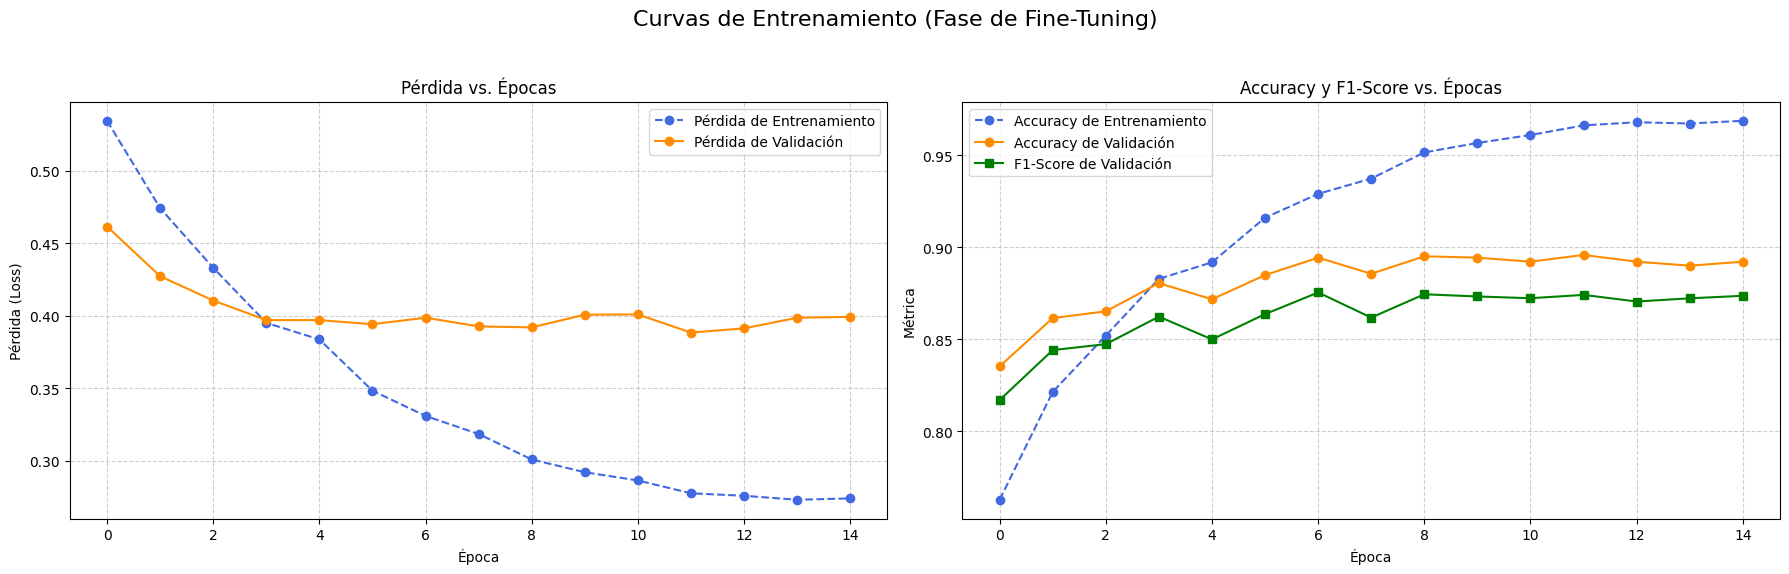

In [ ]:
# ============================================================================
# BLOQUE PARA VISUALIZAR LAS CURVAS DE ENTRENAMIENTO
# (Ejecutar en una nueva celda después del entrenamiento)
# ============================================================================

import matplotlib.pyplot as plt

# Extraer el historial de la Fase 2 (Fine-Tuning)
history_ft = history # La variable 'history' ya contiene los datos de la fase 2

print("Generando gráficos de la fase de Fine-Tuning...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Curvas de Entrenamiento (Fase de Fine-Tuning)', fontsize=16)

# --- Gráfico de Pérdida (Loss) ---
ax1.plot(history_ft['train_loss'], label='Pérdida de Entrenamiento', color='royalblue', marker='o', linestyle='--')
ax1.plot(history_ft['val_loss'], label='Pérdida de Validación', color='darkorange', marker='o', linestyle='-')
ax1.set_title('Pérdida vs. Épocas')
ax1.set_xlabel('Época')
ax1.set_ylabel('Pérdida (Loss)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# --- Gráfico de Métricas (Accuracy y F1-Score) ---
ax2.plot(history_ft['train_acc'], label='Accuracy de Entrenamiento', color='royalblue', marker='o', linestyle='--')
ax2.plot(history_ft['val_acc'], label='Accuracy de Validación', color='darkorange', marker='o', linestyle='-')
ax2.plot(history_ft['val_f1'], label='F1-Score de Validación', color='green', marker='s', linestyle='-')
ax2.set_title('Accuracy y F1-Score vs. Épocas')
ax2.set_xlabel('Época')
ax2.set_ylabel('Métrica')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Seleccionando una imagen aleatoria del conjunto de test para la predicción...

--- Ejemplo de Predicción ---
Imagen: VizWiz_v2_000000041471.jpg
Etiqueta Real: Privada
Predicción del Modelo: Privada
Confianza de la Predicción: 95.63%


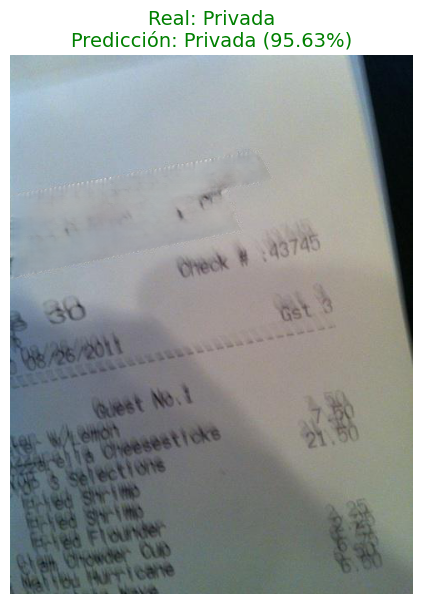

In [ ]:
# ============================================================================
# BLOQUE PARA REALIZAR UNA PREDICCIÓN EN UNA IMAGEN DE EJEMPLO
# (Ejecutar en una nueva celda después del entrenamiento)
# ============================================================================

from PIL import Image
import numpy as np

def predict_image(model, image_path, transform, device):
    """
    Predice si una imagen es privada o no.

    Args:
        model: Modelo entrenado y cargado en el dispositivo.
        image_path: Ruta a la imagen.
        transform: Transformaciones a aplicar (debe ser el de validación/test).
        device: Dispositivo (CPU/GPU) donde se encuentra el modelo.

    Returns:
        prediction (int): 0 (Pública) o 1 (Privada).
        confidence (float): Probabilidad de la clase predicha (de 0 a 1).
    """
    # Asegurarse de que el modelo esté en modo de evaluación
    model.eval()

    try:
        # Cargar la imagen
        image = Image.open(image_path).convert('RGB')
    except FileNotFoundError:
        print(f"Error: No se pudo encontrar la imagen en la ruta: {image_path}")
        return None, None

    # Aplicar las transformaciones y añadir una dimensión de batch
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Realizar la predicción sin calcular gradientes
    with torch.no_grad():
        outputs = model(image_tensor)

        # Calcular probabilidades usando softmax
        probabilities = torch.softmax(outputs, dim=1)

        # Obtener la clase con la mayor probabilidad
        prediction = torch.argmax(probabilities, dim=1).item()

        # Obtener el valor de la confianza para la clase predicha
        confidence = probabilities[0][prediction].item()

    return prediction, confidence

# --- Ejemplo de uso ---

# Cargar el mejor modelo guardado (asegúrate de que esta línea se haya ejecutado)
# model.load_state_dict(torch.load('best_resnet50_privacy_optimized.pth'))
# model.to(device)

print("Seleccionando una imagen aleatoria del conjunto de test para la predicción...")

# Tomar una imagen aleatoria del conjunto de test que fue limpiado
sample_idx = np.random.randint(0, len(test_df_cleaned))
sample_row = test_df_cleaned.iloc[sample_idx]
sample_image_name = sample_row['image']
real_label = sample_row['private']

# Construir la ruta a la imagen
base_name = os.path.splitext(sample_image_name)[0]
sample_path = os.path.join(IMAGE_DIR, base_name + '.png')

# Hacer la predicción
prediction, confidence = predict_image(model, sample_path, val_transform, device)

if prediction is not None:
    # Imprimir los resultados
    print(f"\n--- Ejemplo de Predicción ---")
    print(f"Imagen: {sample_image_name}")
    print(f"Etiqueta Real: {'Privada' if real_label == 1 else 'Pública'}")
    print(f"Predicción del Modelo: {'Privada' if prediction == 1 else 'Pública'}")
    print(f"Confianza de la Predicción: {confidence:.2%}")

    # Mostrar la imagen con los resultados
    plt.figure(figsize=(7, 7))
    img = Image.open(sample_path)
    plt.imshow(img)

    # Añadir un título descriptivo
    title_text = (f"Real: {'Privada' if real_label == 1 else 'Pública'}\n"
                  f"Predicción: {'Privada' if prediction == 1 else 'Pública'} ({confidence:.2%})")

    # Cambiar el color del título basado en si la predicción es correcta
    if prediction == real_label:
        plt.title(title_text, color='green', fontsize=14)
    else:
        plt.title(title_text, color='red', fontsize=14)

    plt.axis('off')
    plt.show()